In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4, dummy_features=3):
    """
    Cria um dataset bidimensional binário com
    algumas características inúteis.
    """
    X = np.random.uniform(size=(n,dummy_features+2))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
dummy_features = 3
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept, dummy_features=dummy_features)
Xtr, ytr

(array([[0.54207276, 0.69119246, 0.43855071, 0.37703397, 0.73515012],
        [0.19437639, 0.25908301, 0.34144464, 0.49970884, 0.93943483],
        [0.84880959, 0.09646715, 0.48729891, 0.45715257, 0.91653907],
        [0.05935219, 0.8550337 , 0.90159745, 0.9869844 , 0.57293494],
        [0.02815141, 0.14359366, 0.68836476, 0.45756516, 0.11925748],
        [0.02411525, 0.50220373, 0.98168238, 0.66094983, 0.71725879],
        [0.36641697, 0.55659383, 0.53013535, 0.89068395, 0.34380421],
        [0.81705788, 0.30612933, 0.42238098, 0.21478611, 0.74549768],
        [0.39780982, 0.31417863, 0.21131102, 0.41707631, 0.86363109],
        [0.27373018, 0.71630685, 0.47705743, 0.12993208, 0.06319343],
        [0.08788071, 0.28763352, 0.22064813, 0.50547179, 0.57644648],
        [0.85763867, 0.30248612, 0.73714157, 0.45494341, 0.84925557],
        [0.39605982, 0.03104268, 0.31421489, 0.44071641, 0.41889036],
        [0.78488041, 0.5560601 , 0.73770625, 0.64004003, 0.89187129],
        [0.19152841,

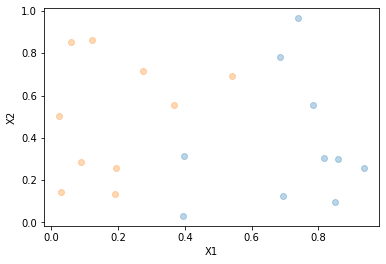

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

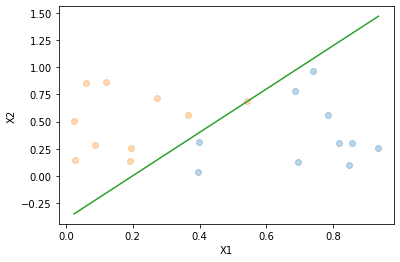

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [6]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y, activation):
        pass


class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    def getW(self, X, y):
        if self.regularization == 0:
            return np.linalg.pinv(X) @ y
        return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
    def __init__(self, max_iter=250, learning_rate=0.02, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.regularization = regularization

    def getW(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            w *= 1 - self.regularization * self.learning_rate
            w += (X.T @ erros) * self.learning_rate
        return w

0.95
[-0.98724154  2.49290619 -0.50871169 -0.08384481 -0.09962028  0.30991393]
7.561015511856482


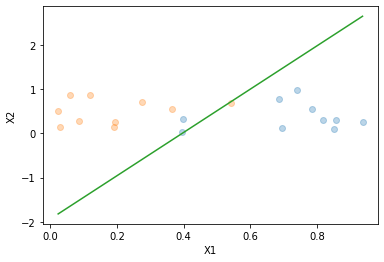

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão Adaline do Perceptron com limite de iterações,
    treinado em batch, com bias e taxa de aprendizado.
    """
    def __init__(self, training_algorithm=DescidaGradiente()):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algorithm
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = self.training_algorithm.getW(Xb, y)
    
    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [8]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept, dummy_features=dummy_features)

0.932


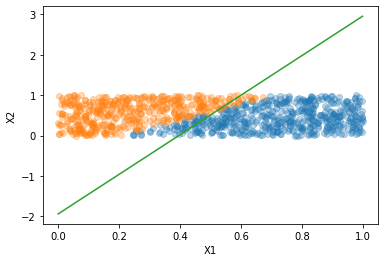

In [9]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])


0.95
[-0.53115357  1.50484142 -0.4409187  -0.06331319 -0.32532885  0.45925818]


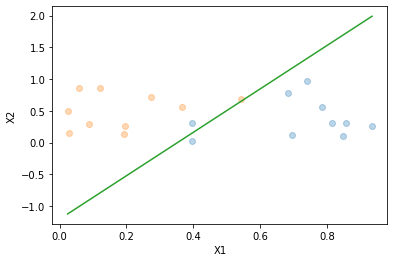

0.905
3.0618465922628686


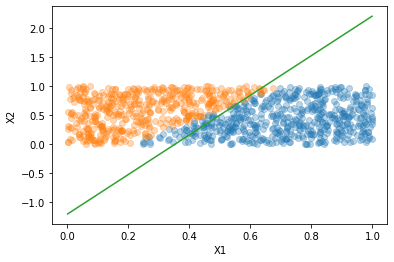

In [10]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [11]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


0.95 0.927 [-0.98025266  2.54516274 -0.51871134 -0.15280798 -0.00607974  0.25318078]
0.95 0.914 [-0.68368002  1.84779288 -0.48119644 -0.05653571 -0.31467913  0.45341916]
0.95 0.905 [-0.5310993   1.50470477 -0.4409108  -0.06320132 -0.32558812  0.459379  ]


In [12]:
perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


0.95 0.928 [-0.9882285   2.54671975 -0.51461537 -0.1442996  -0.00765295  0.25511864]
0.95 0.914 [-0.68478776  1.84709799 -0.48084503 -0.05455833 -0.31579037  0.45454855]
0.95 0.905 [-0.5311694   1.50453157 -0.4408603  -0.06292174 -0.32590291  0.4595861 ]
